# Polynomial Regression

In [1]:
# prerequisites 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Defining all used functions first

In [2]:
#note this is for 3 features standard polynomial only 
def standard_poly(deg,x_train):
    arr =[]
    for i in range(deg+1):
        for j in range(deg+1-i):
            for k in range(deg+1-j-i):
                arr.append((x_train[:,0].reshape(-1,1)**i)*(x_train[:,1].reshape(-1,1)**j)*(x_train[:,2].reshape(-1,1)**k))
    return np.array(arr).reshape(len(arr),x_train.shape[0])

def compute_cost(x,y,w,b):
    return (np.sum((np.matmul(x,w.T)+b-y)**2))/(2*x.shape[0])

def compute_gradient(x,y,w,b):
    variab = (np.dot(x,w.T)+b-y) #where variable = w.x+b-y
    m,n=x.shape #where m = number of observations and n = number of features
    dj_db = np.mean(variab,axis=0)
    dj_dw = (np.dot(variab.T,x))/x.shape[0]
    return dj_dw,dj_db

def z_score_normalization(x):
    mean_values = np.mean(x, axis=0)
    std_deviation = np.std(x, axis=0)
    z_score_normalized_data = (x - mean_values) / std_deviation
    return z_score_normalized_data , mean_values , std_deviation

def gradient_descent(x,y,w,b,alpha,num_iter):
    
    cost_his = ["starting"]
    for i in range(num_iter): 
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w-=alpha*dj_dw
        b-=alpha*dj_db
        if i%(num_iter//10)==0:
            print(f'Cost for {i}th iteration = {cost_his[i]}')
        cost_his.append(compute_cost(x,y,w,b))
    return w,b,np.array(cost_his[1:])

def plotting_costVSnum_iter(cost,num_iter):
    plt.title("Cost VS number of iterations graph")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost (error)")
    plt.plot(np.arange(0,num_iter),cost)
    plt.show()

def R2score(y_actual, y_predicted):
    y_mean_of_actual = np.mean(y_actual)
    a = np.sum(np.square(y_actual - y_predicted))
    b = np.sum(np.square(y_actual - y_mean_of_actual))
    R2 = 1 - (a / b)
    return R2

### Reading the given data and visualizing it

In [3]:
df = pd.read_csv('train_data/Polynomialdata_train.csv')
df

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367
...,...,...,...,...
49995,1.853922e+04,-25.309264,-6.094516,75.361431
49996,6.379917e+03,-58.016982,-6.064214,27.146387
49997,3.835601e+06,29.857894,1.422973,75.620505
49998,2.580318e+04,10.793146,1.215972,34.437761


In [4]:
#converting datafram to numpy and assigning it to x_train and y_train
df2=df.to_numpy()
x_t = df2[:,1:]
y_train = df2[:,0]
x_train , mean1,std_deviation1= z_score_normalization(x_t) #Applying Normalization for efficiency

In [5]:
x_t.max() , x_train.max()

(232.6831836057284, 4.408087291804612)

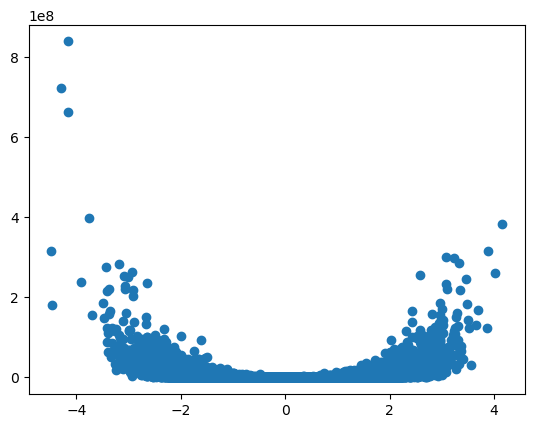

In [6]:
#visualising the data 
plt.scatter(x_train[:,2],y_train)

### Using standard Polynomial function for Poly Regression and taking 6 degree polynomial

In [7]:
x_f = standard_poly(6,x_train).T[:,1:] #6 degree polynomial after testing all different polynomials

In [8]:
x_f.max()

10520.72233765989

In [9]:
x_f,mean2,std_dev2 = z_score_normalization(x_f) #applying normalization again

In [10]:
x_f.max()

105.61789084990133

### Splitting the data into training and cross validation

In [11]:
x_train_data = x_f[:45000,:]
y_train_data = y_train[:45000].reshape(-1,1)
x_cv = x_f[45000:,:]
y_cv = y_train[45000:].reshape(-1,1)

### Now Applying gradient descent algo with num_iter=100

In [ ]:
import time
s=time.time()
alpha = 0.27
w=np.zeros((1,x_f.shape[1]))
b=np.array([[0.0]])
num_iter = 10000
w_n,b_n,cost_n = gradient_descent(x_train_data,y_train_data,w,b,alpha,num_iter)
print(f"Time Taken = {(time.time()-s)/60} mins")

Cost for 0th iteration = starting


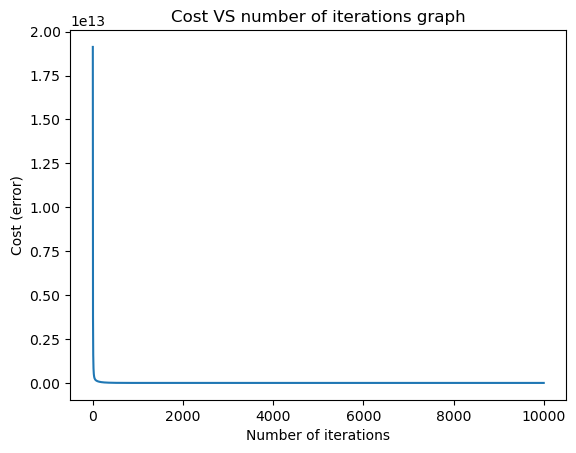

Minimum cost = 6.437621713661311e-13


In [13]:
plotting_costVSnum_iter(cost_n,num_iter)
print(f'Minimum cost = {cost_n.min()}')

### checking cross validation set and training set R2 score 

In [14]:
print("Training set R2 score : " , R2score(y_train_data,np.matmul(x_train_data,w_n.T)+b_n)) #train
print("Cross validation set R2 score : ", R2score(y_cv,np.matmul(x_cv,w_n.T)+b_n)) #cv

Training set R2 score :  1.0
Cross validation set R2 score :  1.0


### Predicting the output for test data

In [15]:
df_tes = pd.read_csv('test_data/Polynomialdata_test.csv')
df_test = df_tes.to_numpy()
df_tes

,ID,feature 1,feature 2,feature 3
0,16588,36.247643,-2.372704,43.835947
1,17513,5.903779,5.460086,-96.149414
2,14448,-37.298157,6.869786,-14.084487
3,13972,-40.080077,2.395066,-43.432941
4,18321,-20.417799,-2.194459,5.737226
...,...,...,...,...
9995,19691,-13.571554,2.931176,76.902716
9996,10512,-2.015904,-2.827700,4.999604
9997,17741,47.095192,-1.977461,39.044902
9998,18381,-1.808178,-0.693782,57.918628


In [16]:
x_tes = df_test[:,1:]
x_test2 = (x_tes-mean1)/std_deviation1 

In [17]:
x_1 = standard_poly(6,x_test2)
x_2 = x_1.T[:,1:]
x_test = (x_2-mean2)/std_dev2

In [18]:
y_predicted = np.matmul(x_test,w_n.T)+b_n

In [19]:
#Converting Predicted data to csv
final_data = np.concatenate((df_test[:,0].reshape(-1,1),y_predicted.reshape(-1,1)),axis=1)

In [20]:
data_frame = pd.DataFrame(final_data)
data_frame.columns = ["ID's", 'Predictions']

In [21]:
data_frame

,ID's,Predictions
0,16588.0,566024.053595
1,17513.0,954693.466723
2,14448.0,19975.649684
3,13972.0,732186.076918
4,18321.0,58.566734
...,...,...
9995,19691.0,217537.380927
9996,10512.0,0.000122
9997,17741.0,913425.782931
9998,18381.0,74434.821230


In [22]:
#finaly converting dataframe to csv
data_frame.to_csv('predicted_data/PolynomialData_prediction_final.csv' , index = False) 